In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/IITGOA/train.csv'
test_path = '/content/drive/MyDrive/IITGOA/sample_test.csv'
oil_path = '/content/drive/MyDrive/IITGOA/oil.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
oil = pd.read_csv(oil_path)


In [ ]:
oil

,date,dcoilwtico
0,2020-01-01,NaN
1,2020-01-02,93.14
2,2020-01-03,92.97
3,2020-01-04,93.12
4,2020-01-07,93.20
...,...,...
1039,2023-12-26,NaN
1040,2023-12-27,52.82
1041,2023-12-28,54.01
1042,2023-12-29,53.80


In [ ]:
test

,id,date,store_nbr,family,onpromotion
0,2596374,2024-01-01,1,AUTOMOTIVE,0
1,2596375,2024-01-01,1,BABY CARE,0
2,2596376,2024-01-01,1,BEAUTY,0
3,2596377,2024-01-01,1,BEVERAGES,0
4,2596378,2024-01-01,1,BOOKS,0
...,...,...,...,...,...
26725,2623099,2024-01-15,9,POULTRY,1
26726,2623100,2024-01-15,9,PREPARED FOODS,1
26727,2623101,2024-01-15,9,PRODUCE,7
26728,2623102,2024-01-15,9,SCHOOL AND OFFICE SUPPLIES,0


In [ ]:
train_merged = train.merge(oil, on='date', how='left')


In [ ]:
train_merged

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2020-01-01,1,AUTOMOTIVE,0.000,0,NaN
1,1,2020-01-01,1,BABY CARE,0.000,0,NaN
2,2,2020-01-01,1,BEAUTY,0.000,0,NaN
3,3,2020-01-01,1,BEVERAGES,0.000,0,NaN
4,4,2020-01-01,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
2596369,2596369,2023-12-31,9,POULTRY,687.853,1,NaN
2596370,2596370,2023-12-31,9,PREPARED FOODS,100.405,1,NaN
2596371,2596371,2023-12-31,9,PRODUCE,3091.356,3,NaN
2596372,2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,NaN


In [ ]:
missing_dates = train[~train['date'].isin(oil['date'])]

In [ ]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')
train = train.merge(oil, how='left', on='date')

In [ ]:
oil

,date,dcoilwtico
0,2020-01-01,NaN
1,2020-01-02,93.14
2,2020-01-03,92.97
3,2020-01-04,93.12
4,2020-01-07,93.20
...,...,...
1039,2023-12-26,52.01
1040,2023-12-27,52.82
1041,2023-12-28,54.01
1042,2023-12-29,53.80


In [ ]:
train_merged.head(2000)

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2020-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2020-01-01,1,BABY CARE,0.0,0,NaN
2,2,2020-01-01,1,BEAUTY,0.0,0,NaN
3,3,2020-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2020-01-01,1,BOOKS,0.0,0,NaN
...,...,...,...,...,...,...,...
1995,1995,2020-01-02,15,HOME AND KITCHEN I,0.0,0,93.14
1996,1996,2020-01-02,15,HOME AND KITCHEN II,0.0,0,93.14
1997,1997,2020-01-02,15,HOME APPLIANCES,0.0,0,93.14
1998,1998,2020-01-02,15,HOME CARE,0.0,0,93.14


In [ ]:
train_merged['dcoilwtico'].mean()

70.73858275520311

In [ ]:
train_merged.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
dcoilwtico,798336


In [ ]:
train_merged.shape

(2596374, 7)

In [ ]:
test

,id,date,store_nbr,family,onpromotion
0,2596374,2024-01-01,1,AUTOMOTIVE,0
1,2596375,2024-01-01,1,BABY CARE,0
2,2596376,2024-01-01,1,BEAUTY,0
3,2596377,2024-01-01,1,BEVERAGES,0
4,2596378,2024-01-01,1,BOOKS,0
...,...,...,...,...,...
26725,2623099,2024-01-15,9,POULTRY,1
26726,2623100,2024-01-15,9,PREPARED FOODS,1
26727,2623101,2024-01-15,9,PRODUCE,7
26728,2623102,2024-01-15,9,SCHOOL AND OFFICE SUPPLIES,0


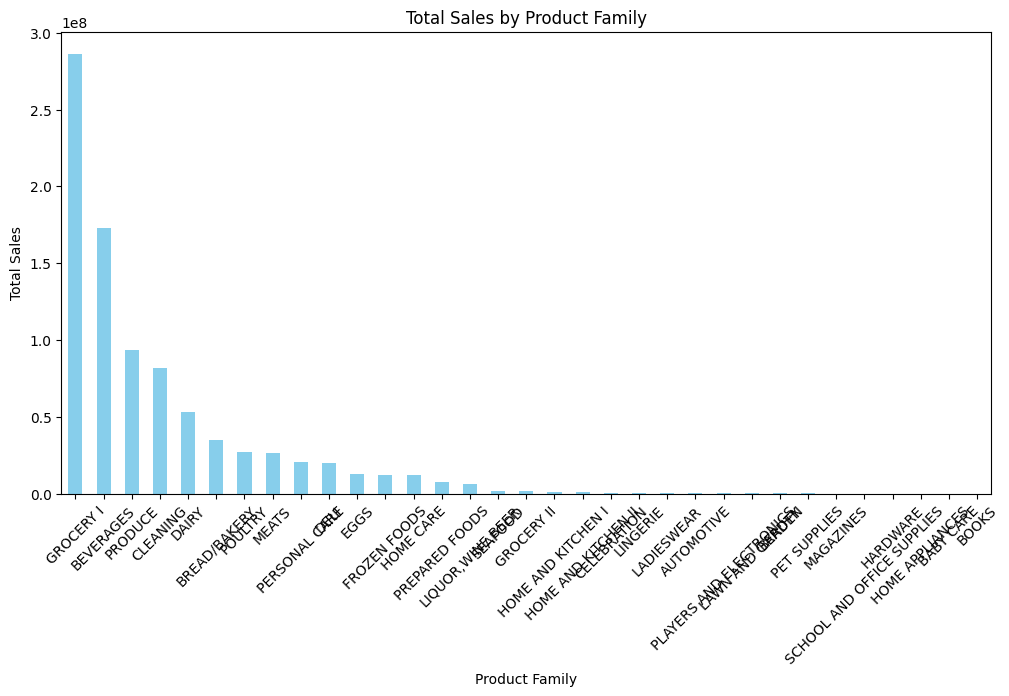

In [ ]:
family_sales = train_merged.groupby('family')['sales'].sum().sort_values(ascending=False)

family_sales.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Total Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


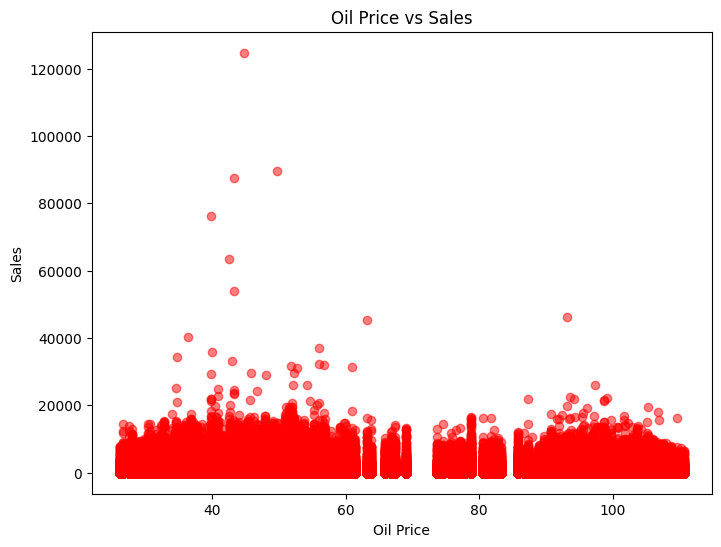

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train_merged['dcoilwtico'], train_merged['sales'], alpha=0.5, color='red')
plt.title('Oil Price vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()


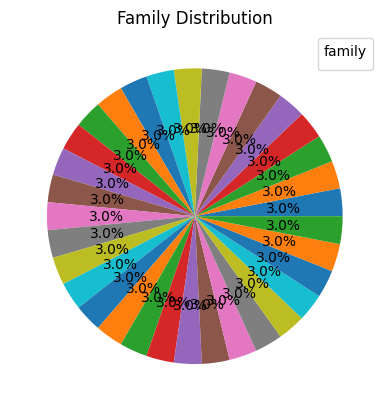

In [ ]:
plt.pie(train_merged['family'].value_counts(), autopct='%1.1f%%')
plt.title('Family Distribution')
plt.legend(title='family')
plt.show()

In [ ]:
correlation_matrix = train_merged.pivot_table(index='date', columns='family', values='sales').corrwith(train_merged['dcoilwtico'])

In [ ]:
train_merged['dcoilwtico'].fillna(method='ffill', inplace=True)
train_merged['dcoilwtico'].fillna(method='bfill', inplace=True)

In [ ]:
train_merged

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2020-01-01,1,BABY CARE,0.000,0,93.14
2,2,2020-01-01,1,BEAUTY,0.000,0,93.14
3,3,2020-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2020-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
2596369,2596369,2023-12-31,9,POULTRY,687.853,1,53.75
2596370,2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75
2596371,2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75
2596372,2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75


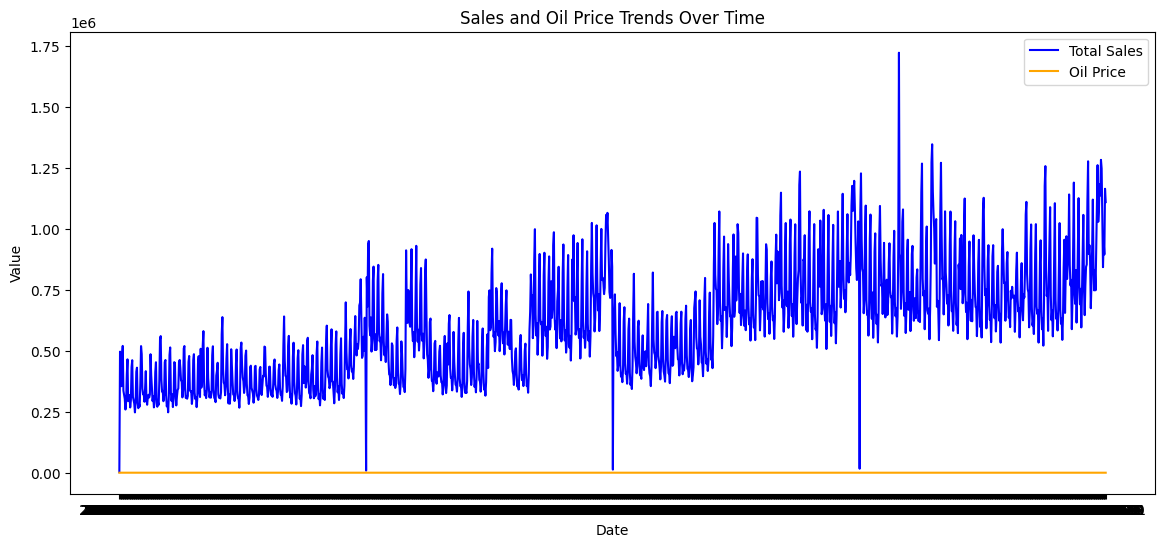

In [ ]:
sales_trend = train_merged.groupby('date').agg({'sales': 'sum', 'dcoilwtico': 'mean'}).reset_index()

plt.figure(figsize=(14, 6))
plt.plot(sales_trend['date'], sales_trend['sales'], label='Total Sales', color='blue')
plt.plot(sales_trend['date'], sales_trend['dcoilwtico'], label='Oil Price', color='orange')
plt.legend()
plt.title('Sales and Oil Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [ ]:
# Step 1: Calculate total sales per family
family_sales_total = train_merged.groupby('family')['sales'].sum()

# Step 2: Calculate percentage contribution
total_sales = family_sales_total.sum()
family_sales_percentage = (family_sales_total / total_sales) * 100

# Display the contributions sorted in descending order
family_contribution = family_sales_percentage.sort_values(ascending=False)
print("Contribution of each family to total sales (in %):")
print(family_contribution)


Contribution of each family to total sales (in %):
family
GROCERY I                     32.557735
BEVERAGES                     19.672096
PRODUCE                       10.623870
CLEANING                       9.326799
DAIRY                          6.030285
BREAD/BAKERY                   4.013243
POULTRY                        3.077125
MEATS                          3.018504
PERSONAL CARE                  2.338156
DELI                           2.299597
EGGS                           1.497740
FROZEN FOODS                   1.412864
HOME CARE                      1.394045
PREPARED FOODS                 0.859755
LIQUOR,WINE,BEER               0.754225
SEAFOOD                        0.198281
GROCERY II                     0.187304
HOME AND KITCHEN I             0.164617
HOME AND KITCHEN II            0.131394
CELEBRATION                    0.067662
LINGERIE                       0.064489
LADIESWEAR                     0.057325
AUTOMOTIVE                     0.052739
PLAYERS AND ELECTRONIC

In [ ]:
impactful_families = family_contribution[family_contribution > 1].index

train_merged_filtered = train_merged[train_merged['family'].isin(impactful_families)]

print(f"Total families before filtering: {train_merged['family'].nunique()}")
print(f"Total families after filtering: {train_merged_filtered['family'].nunique()}")
print(f"Families removed: {set(train_merged['family'].unique()) - set(impactful_families)}")

Total families before filtering: 33
Total families after filtering: 13
Families removed: {'PET SUPPLIES', 'BOOKS', 'SEAFOOD', 'LIQUOR,WINE,BEER', 'PREPARED FOODS', 'HOME APPLIANCES', 'SCHOOL AND OFFICE SUPPLIES', 'BEAUTY', 'HARDWARE', 'LAWN AND GARDEN', 'LINGERIE', 'AUTOMOTIVE', 'LADIESWEAR', 'MAGAZINES', 'HOME AND KITCHEN II', 'PLAYERS AND ELECTRONICS', 'BABY CARE', 'CELEBRATION', 'GROCERY II', 'HOME AND KITCHEN I'}


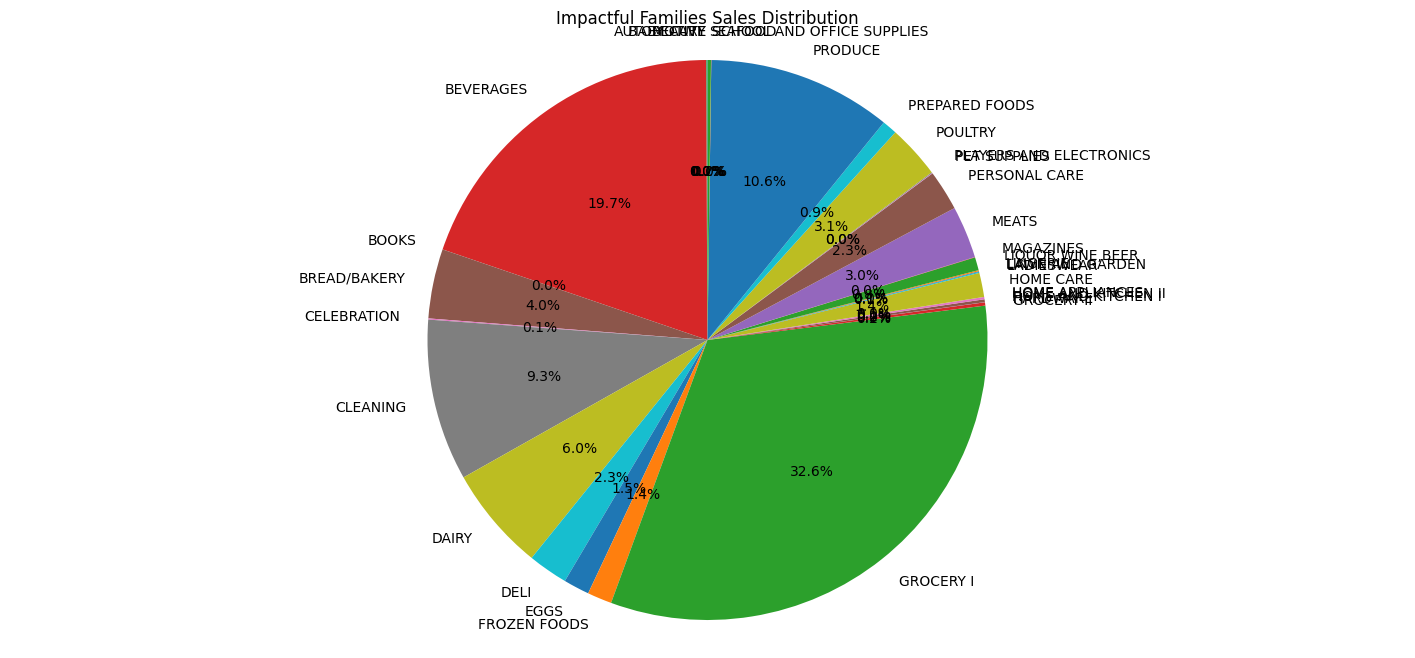

In [ ]:
# prompt: plot pie chart of impactful families as per their sales

# Assuming 'family_sales_percentage' is already calculated as in the previous code

plt.figure(figsize=(18, 8))
plt.pie(family_sales_percentage, labels=family_sales_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Impactful Families Sales Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
train_merged

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2020-01-01,1,BABY CARE,0.000,0,93.14
2,2,2020-01-01,1,BEAUTY,0.000,0,93.14
3,3,2020-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2020-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
2596369,2596369,2023-12-31,9,POULTRY,687.853,1,53.75
2596370,2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75
2596371,2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75
2596372,2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75


In [ ]:
one_hot_encoded = pd.get_dummies(train_merged_filtered['family'], prefix='family')

# Concatenate the one-hot encoded columns back to the original dataframe
train_merged_filtered = pd.concat([train_merged_filtered, one_hot_encoded], axis=1)

# Verify the result
print(train_merged_filtered.head())

   id        date  store_nbr        family  sales  onpromotion  dcoilwtico  \
3   3  2020-01-01          1     BEVERAGES    0.0            0       93.14   
5   5  2020-01-01          1  BREAD/BAKERY    0.0            0       93.14   
7   7  2020-01-01          1      CLEANING    0.0            0       93.14   
8   8  2020-01-01          1         DAIRY    0.0            0       93.14   
9   9  2020-01-01          1          DELI    0.0            0       93.14   

   family_BEVERAGES  family_BREAD/BAKERY  family_CLEANING  family_DAIRY  \
3              True                False            False         False   
5             False                 True            False         False   
7             False                False             True         False   
8             False                False            False          True   
9             False                False            False         False   

   family_DELI  family_EGGS  family_FROZEN FOODS  family_GROCERY I  \
3        F

In [ ]:
train_merged_filtered["date"] = pd.to_datetime(train_merged_filtered["date"])

In [ ]:
train_merged_filtered=train_merged_filtered.drop(['family'],axis=1)

In [ ]:
train_merged_filtered

,id,date,store_nbr,sales,onpromotion,dcoilwtico,family_BEVERAGES,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_HOME CARE,family_MEATS,family_PERSONAL CARE,family_POULTRY,family_PRODUCE
3,3,2020-01-01,1,0.000,0,93.14,True,False,False,False,False,False,False,False,False,False,False,False,False
5,5,2020-01-01,1,0.000,0,93.14,False,True,False,False,False,False,False,False,False,False,False,False,False
7,7,2020-01-01,1,0.000,0,93.14,False,False,True,False,False,False,False,False,False,False,False,False,False
8,8,2020-01-01,1,0.000,0,93.14,False,False,False,True,False,False,False,False,False,False,False,False,False
9,9,2020-01-01,1,0.000,0,93.14,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596359,2596359,2023-12-31,9,515.000,7,53.75,False,False,False,False,False,False,False,False,True,False,False,False,False
2596365,2596365,2023-12-31,9,278.092,0,53.75,False,False,False,False,False,False,False,False,False,True,False,False,False
2596366,2596366,2023-12-31,9,516.000,13,53.75,False,False,False,False,False,False,False,False,False,False,True,False,False
2596369,2596369,2023-12-31,9,687.853,1,53.75,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
train_merged_filtered['date'] = pd.to_datetime(train_merged_filtered['date'])
train_merged_filtered['date_as_int_yyyymmdd'] = train_merged_filtered['date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
train_merged_filtered=train_merged_filtered.drop(['date','dcoilwtico'],axis=1)
train_merged_filtered

,id,store_nbr,sales,onpromotion,family_BEVERAGES,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_HOME CARE,family_MEATS,family_PERSONAL CARE,family_POULTRY,family_PRODUCE,date_as_int_yyyymmdd
3,3,1,0.000,0,True,False,False,False,False,False,False,False,False,False,False,False,False,20200101
5,5,1,0.000,0,False,True,False,False,False,False,False,False,False,False,False,False,False,20200101
7,7,1,0.000,0,False,False,True,False,False,False,False,False,False,False,False,False,False,20200101
8,8,1,0.000,0,False,False,False,True,False,False,False,False,False,False,False,False,False,20200101
9,9,1,0.000,0,False,False,False,False,True,False,False,False,False,False,False,False,False,20200101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596359,2596359,9,515.000,7,False,False,False,False,False,False,False,False,True,False,False,False,False,20231231
2596365,2596365,9,278.092,0,False,False,False,False,False,False,False,False,False,True,False,False,False,20231231
2596366,2596366,9,516.000,13,False,False,False,False,False,False,False,False,False,False,True,False,False,20231231
2596369,2596369,9,687.853,1,False,False,False,False,False,False,False,False,False,False,False,True,False,20231231


Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(
    train_merged_filtered, test_size=0.4, random_state=42
)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Separate features and target for each set
X_train, y_train = train_data.drop(columns=['sales']), train_data['sales']
X_val, y_val = val_data.drop(columns=['sales']), val_data['sales']
X_test, y_test = test_data.drop(columns=['sales']), test_data['sales']

# Initialize and train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_reg.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = dt_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = dt_reg.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# Evaluate the model on the test set
y_test_pred = dt_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print RMSE and R² results for all sets
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

print(f"Training R² Score: {r2_train:.4f}")
print(f"Validation R² Score: {r2_val:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


Training RMSE: 636.77
Validation RMSE: 717.39
Test RMSE: 712.00
Training R² Score: 0.8306
Validation R² Score: 0.7940
Test R² Score: 0.7895


Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(
    train_merged_filtered, test_size=0.4, random_state=42
)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Separate features and target for each set
X_train, y_train = train_data.drop(columns=['sales']), train_data['sales']
X_val, y_val = val_data.drop(columns=['sales']), val_data['sales']
X_test, y_test = test_data.drop(columns=['sales']), test_data['sales']

# Initialize and train the Decision Tree Regressor
rf_reg = RandomForestRegressor(max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = rf_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the validation set
y_val_pred = rf_reg.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# Evaluate the model on the test set
y_test_pred = rf_reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print RMSE and R² results for all sets
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

print(f"Training R² Score: {r2_train:.4f}")
print(f"Validation R² Score: {r2_val:.4f}")
print(f"Test R² Score: {r2_test:.4f}")


Training RMSE: 616.34
Validation RMSE: 695.14
Test RMSE: 683.17
Training R² Score: 0.8413
Validation R² Score: 0.8066
Test R² Score: 0.8062


In [ ]:
one_hot_encoded = pd.get_dummies(test['family'], prefix='family')

# Concatenate the one-hot encoded columns back to the original dataframe
test = pd.concat([test, one_hot_encoded], axis=1)

# Verify the result
test_filtered=test.drop(['family'],axis=1)
print(test_filtered.head())


        id        date  store_nbr  onpromotion  family_AUTOMOTIVE  \
0  2596374  2024-01-01          1            0               True   
1  2596375  2024-01-01          1            0              False   
2  2596376  2024-01-01          1            0              False   
3  2596377  2024-01-01          1            0              False   
4  2596378  2024-01-01          1            0              False   

   family_BABY CARE  family_BEAUTY  family_BEVERAGES  family_BOOKS  \
0             False          False             False         False   
1              True          False             False         False   
2             False           True             False         False   
3             False          False              True         False   
4             False          False             False          True   

   family_BREAD/BAKERY  ...  family_MAGAZINES  family_MEATS  \
0                False  ...             False         False   
1                False  ...           

In [ ]:
test_filtered['date'] = pd.to_datetime(test_filtered['date'])
test_filtered['date_as_int_yyyymmdd'] = test_filtered['date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
test_filtered

,id,date,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,date_as_int_yyyymmdd
0,2596374,2024-01-01,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20240101
1,2596375,2024-01-01,1,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20240101
2,2596376,2024-01-01,1,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,20240101
3,2596377,2024-01-01,1,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,20240101
4,2596378,2024-01-01,1,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26725,2623099,2024-01-15,9,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,20240115
26726,2623100,2024-01-15,9,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,20240115
26727,2623101,2024-01-15,9,7,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,20240115
26728,2623102,2024-01-15,9,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,20240115


In [ ]:
test_filtered=test_filtered.drop(['date'],axis=1)

In [ ]:
columns_to_keep = [
    'id','store_nbr', 'onpromotion', 'family_BEVERAGES',
    'family_BREAD/BAKERY', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
    'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
    'family_HOME CARE', 'family_MEATS', 'family_PERSONAL CARE',
    'family_POULTRY', 'family_PRODUCE', 'date_as_int_yyyymmdd'
]

# Retain only the required columns in test_filtered
test_filtered = test_filtered[columns_to_keep]

In [ ]:
test_filtered

,id,store_nbr,onpromotion,family_BEVERAGES,family_BREAD/BAKERY,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_HOME CARE,family_MEATS,family_PERSONAL CARE,family_POULTRY,family_PRODUCE,date_as_int_yyyymmdd
0,2596374,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,20240101
1,2596375,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,20240101
2,2596376,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,20240101
3,2596377,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,20240101
4,2596378,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26725,2623099,9,1,False,False,False,False,False,False,False,False,False,False,False,True,False,20240115
26726,2623100,9,1,False,False,False,False,False,False,False,False,False,False,False,False,False,20240115
26727,2623101,9,7,False,False,False,False,False,False,False,False,False,False,False,False,True,20240115
26728,2623102,9,0,False,False,False,False,False,False,False,False,False,False,False,False,False,20240115


In [ ]:
test_data = test_filtered.copy()  # Replace with actual test dataset if not already loaded

# Predict sales using the trained Random Forest model
test_data['sales'] = rf_reg.predict(test_data)

# Create the final DataFrame with 'id' and 'sales' columns
output = test_data[['id', 'sales']]
output
# Save to CSV
output.to_csv('sales_predictions.csv', index=False)

print("Predictions saved to 'sales_predictions.csv'")
output

Predictions saved to 'sales_predictions.csv'


,id,sales
0,2596374,269.954004
1,2596375,269.954004
2,2596376,269.954004
3,2596377,2239.788800
4,2596378,269.954004
...,...,...
26725,2623099,508.605565
26726,2623100,269.954004
26727,2623101,1375.144490
26728,2623102,269.954004
